In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:/Users/Administrator/Desktop/ICC machine learning')
data = pd.read_csv('Final project.csv', index_col=0 , error_bad_lines = False)

In [3]:
df = pd.DataFrame(data)
data.shape
print(data.Loan_Status)
data= pd.get_dummies(data, columns=['Gender'])
data= pd.get_dummies(data, columns=['Married'])
data= pd.get_dummies(data, columns=['Education'])
data= pd.get_dummies(data, columns=['Self_Employed'])
data= pd.get_dummies(data, columns=['Property_Area'])
data.Dependents = data.Dependents.fillna(0)
data.LoanAmount = data.LoanAmount.fillna(0)
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(0)
data.Credit_History = data.Credit_History.fillna(0)


Loan_ID
LP001002    Y
LP001003    N
LP001005    Y
LP001006    Y
LP001008    Y
           ..
LP002978    Y
LP002979    Y
LP002983    Y
LP002984    Y
LP002990    N
Name: Loan_Status, Length: 614, dtype: object


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data.Dependents=data.Dependents.replace("3+",3)

In [8]:
data.Loan_Status=data.Loan_Status.replace("Y",1)
data.Loan_Status=data.Loan_Status.replace("N",0)

In [9]:
y = data.Loan_Status
x = data.drop("Loan_Status",axis = 1)

In [11]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [12]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

classifier= LogisticRegression()

# fit the model with data
classifier.fit(x_train,y_train)

#
y_pred=classifier.predict(x_test)


In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)

Accuracy of test set= 79.87012987012987


In [14]:
from sklearn.metrics import confusion_matrix
loan_status=["With Loan","No Loan"]
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=loan_status,
                    columns=loan_status)
cmdf

,With Loan,No Loan
With Loan,23,20
No Loan,11,100


In [21]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=10)

In [22]:
y_pred= classifier.predict(x_test)

In [23]:
cm1 = (confusion_matrix(y_test,y_pred))
cmdf1 = pd.DataFrame(cm1,index=loan_status,
                    columns=loan_status)
cmdf1

,With Loan,No Loan
With Loan,18,25
No Loan,8,103


In [24]:
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)

Accuracy of test set= 78.57142857142857


In [19]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

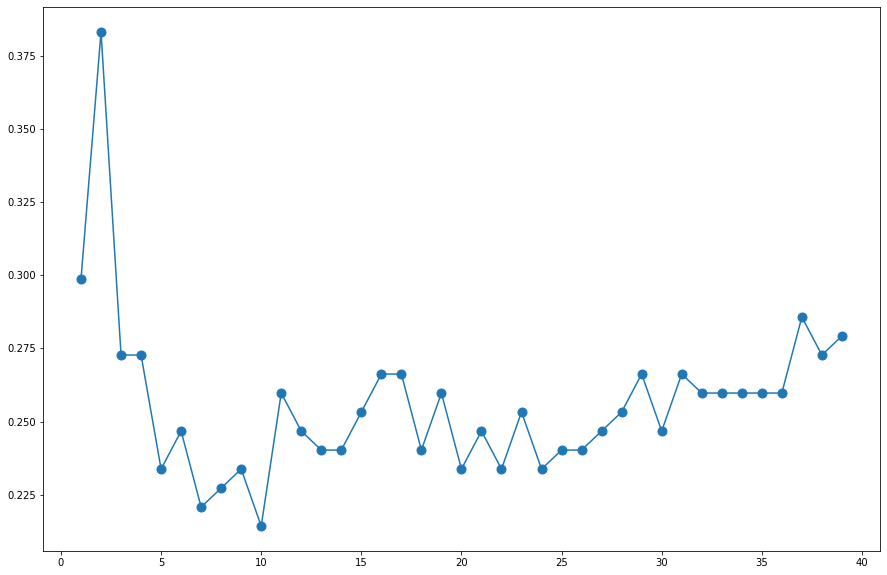

In [20]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error, marker='o', markersize=9)